In [1]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import cv2 as cv
from keras_preprocessing.image import load_img, img_to_array
import numpy as np

In [2]:
def loadData():
    file = open('Alzheimer_s Dataset/alzheimer.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [3]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(2792, 128, 128, 3)
(2792, 3)


In [4]:
n_class = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dense(n_class, activation='softmax'))

In [5]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=10, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/10
35/35 [==============================] - 123s 3s/step - loss: 2.5881 - accuracy: 0.5096 - val_loss: 0.9667 - val_accuracy: 0.5886
Epoch 2/10
35/35 [==============================] - 116s 3s/step - loss: 1.0007 - accuracy: 0.5383 - val_loss: 0.9570 - val_accuracy: 0.5886
Epoch 3/10
35/35 [==============================] - 119s 3s/step - loss: 0.8233 - accuracy: 0.6099 - val_loss: 0.5949 - val_accuracy: 0.7263
Epoch 4/10
35/35 [==============================] - 119s 3s/step - loss: 0.5212 - accuracy: 0.7653 - val_loss: 0.4398 - val_accuracy: 0.8193
Epoch 5/10
35/35 [==============================] - 119s 3s/step - loss: 0.4347 - accuracy: 0.8258 - val_loss: 0.4047 - val_accuracy: 0.8068
Epoch 6/10
35/35 [==============================] - 118s 3s/step - loss: 0.3697 - accuracy: 0.8554 - val_loss: 0.3324 - val_accuracy: 0.8730
Epoch 7/10
35/35 [==============================] - 117s 3s/step - loss: 0.3430 - accuracy: 0.8674 - val_loss: 0.3770 - val_accuracy: 0.8462
Epoch 8/10
35

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 27.8486
Test accuracy 0.8837


In [8]:
model.save('model.h5')

In [9]:
from keras.models import load_model
model5=load_model('model.h5')

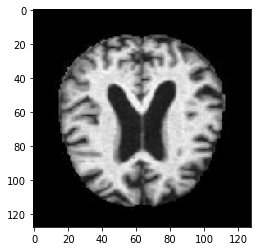

In [11]:
img = load_img('Alzheimer_s Dataset/test/MildDemented/26 (19).jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [12]:
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
# Convert to tensor
img = np.expand_dims(img, axis=0)

In [13]:
class_name = ['MildDemented','ModerateDemented','NonDemented']

In [14]:
model_5 = load_model('model.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

1/1 [==============================] - 0s 459ms/step


('ModerateDemented',
 array([8.131211e-05, 9.999187e-01, 8.017500e-13], dtype=float32))